# Gradient Descent - Function 2

## Author: Himanshu Singhal 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.linalg as la

# Styblinski-Tang function

In [2]:
# Defining the Styblinksi-Tang function
def stytang(x):
    "Generalized n-dimensional version of the Styblinksi - Tang function"
    # f(x) = (x**4 - 16*x**2 + 5*x)/2
    return sum((x[1:]**4 - 16*x[1:]**2 + 5*x[1:])/2 + (x[:-1]**4 - 16*x[:-1]**2 + 5*x[:-1])/2 )

# Derivative of Styblinski-Tang function

In [3]:
# Taking the derivative of the function to minimize it
def stytang_der(x):
    """Derivative of generalized Rosen function."""
    #der = (4*x**3 - 32*x + 5)/2
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
#     return np.array((-16*x[1]**1 + 2*x[1]**3 + 2.5, -16*x[0]**1 + 2*x[0]**3 + 2.5))
    der = np.zeros_like(x)
    der[1:-1] = 2*xm_m1**3 - 16*xm_m1 + 2.5 + 2*xm_p1**3 - 16*xm_p1 + 2.5
    der[0] = 2*x[0]**3 - 16*x[0] + 2.5 
    der[-1] = 2*x[-1]**3 - 16*x[-1] + 2.5
    return der

In [4]:
# from scipy.optimize import fmin

# def f(x):
#     exp = sum((x[:1]**4 - 16*x[:1]**2 + 5*x[:1])/2  + (x[1:]**4 - 16*x[1:]**2 + 5*x[1:])/2)
#     exp = sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)
#     return exp

# fmin(f,np.array([-2 ,-2]))

# Visualize the function

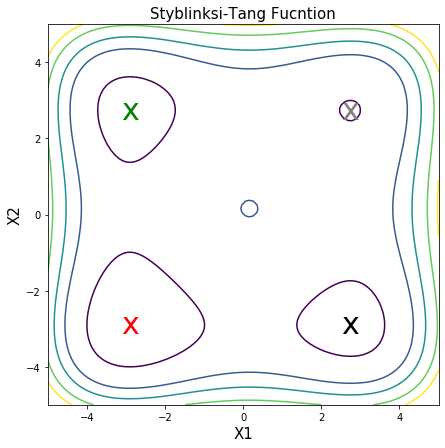

In [5]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

#visualize the Styblinks-Tang function
# Note: the global minimum is at (-2.9,-2.9)
#visualize the stylblinksi-tang function
plt.figure(figsize=(7,7))
levels = [-49,0.01,36,81,121]
Z = 0.5*(X**4 - 16*X**2 + 5*X + Y**4 - 16*Y**2 + 5*Y)
c = plt.contour(X, Y, Z, levels)
plt.text(-2.90, -2.90, 'x', va='center', ha='center', color='red', fontsize=30)
plt.text(-2.90, 2.74, 'x', va='center', ha='center', color='green', fontsize=30)
plt.text(2.74, -2.90, 'x', va='center', ha='center', color='black', fontsize=30)
plt.text(2.74, 2.74, 'x', va='center', ha='center', color='grey', fontsize=30)
plt.title('Styblinksi-Tang Fucntion', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
pass

# Vanilla SGD

In [6]:
# Defining the SGD function for Rosenbrock function
def sgd_ST(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are for stochastic gradient descent
        step = alpha * stytang_der(bestx)
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

# SGD with Momentum

In [7]:
def sgd_momentum_ST(fun, x0, args=(), maxfev=None, alpha=0.0002,beta=0.9,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    v = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        
        # the next 4 lines are for stochastic gradient descent with Momentum
        v = beta*v + (1-beta)*stytang_der(bestx)
        vc = v/(1+beta**(niter))
        step = alpha * vc
        bestx = bestx - step
        
        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))


# SGD with ADAM

In [8]:
def sgd_adam_ST(fun, x0, args=(), maxfev=None, alpha=0.0002,beta=0.9, beta2=0.8, eps=1e-8,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    v = 0
    m = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        
        # the next 6 lines are for stochastic gradient descent with ADAM
        m = beta*m + (1-beta)*stytang_der(bestx)
        v = beta2*v + (1-beta2)*stytang_der(bestx)**2
        mc = m/(1+beta**(niter))
        vc = v/(1+beta2**(niter))
        step =  alpha * m / (eps + np.sqrt(vc))
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [9]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

# Initial Position

In [10]:
# This function is non-convex, therefore for any initial position not of the type (-x1, -x2), the convergence will varry.
# For the type (-x1,-x2) ,the convergence should be at (-2.9,-2.9)
# Initial starting position
x0 = np.array([-4.25, -1.25])

# Visualize the SGDs on the function

In [11]:
ps = [x0]
opt.minimize(stytang, x0, method=sgd_ST, callback=reporter)

     fun: -78.33233140754282
    nfev: 2864
     nit: 2863
 success: True
       x: array([-2.90353403, -2.90353401])

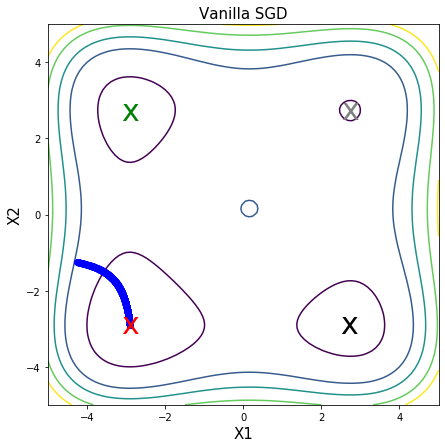

In [12]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [-49,0.01,36,81,121]
Z = 0.5*(X**4 - 16*X**2 + 5*X + Y**4 - 16*Y**2 + 5*Y)
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(-2.9, -2.9, 'x', va='center', ha='center', color='red', fontsize=30)
plt.text(-2.9, 2.7, 'x', va='center', ha='center', color='green', fontsize=30)
plt.text(2.7, -2.9, 'x', va='center', ha='center', color='black', fontsize=30)
plt.text(2.74, 2.74, 'x', va='center', ha='center', color='grey', fontsize=30)
plt.title('Vanilla SGD',fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
pass

In [13]:
ps = [x0]
opt.minimize(stytang, x0, method=sgd_momentum_ST, callback=reporter)

     fun: -78.33233140754282
    nfev: 2717
     nit: 2716
 success: True
       x: array([-2.90353403, -2.90353401])

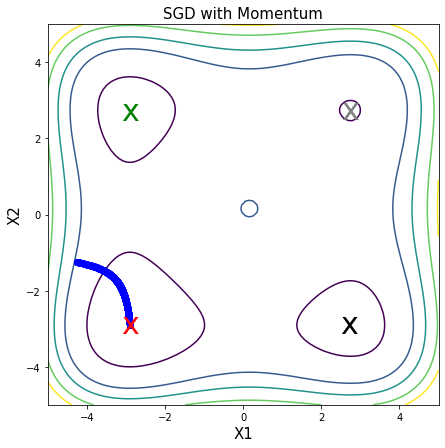

In [14]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [-49,0.01,36,81,121]
Z = 0.5*(X**4 - 16*X**2 + 5*X + Y**4 - 16*Y**2 + 5*Y)
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(-2.9, -2.9, 'x', va='center', ha='center', color='red', fontsize=30)
plt.text(-2.9, 2.7, 'x', va='center', ha='center', color='green', fontsize=30)
plt.text(2.7, -2.9, 'x', va='center', ha='center', color='black', fontsize=30)
plt.text(2.74, 2.74, 'x', va='center', ha='center', color='grey', fontsize=30)
plt.title('SGD with Momentum',fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
pass

In [15]:
ps = [x0]
opt.minimize(stytang, x0, method=sgd_adam_ST, callback=reporter)

     fun: -78.33233140201021
    nfev: 100001
     nit: 100000
 success: True
       x: array([-2.90354384, -2.90354898])

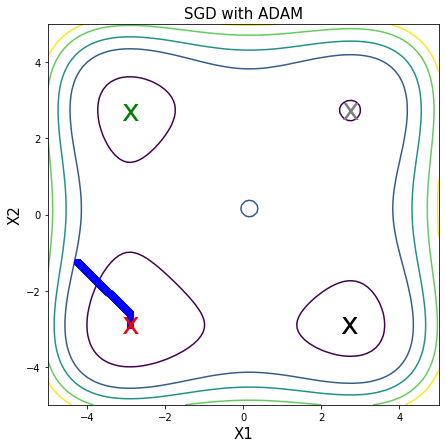

In [16]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [-49,0.01,36,81,121]
Z = 0.5*(X**4 - 16*X**2 + 5*X + Y**4 - 16*Y**2 + 5*Y)
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(-2.9, -2.9, 'x', va='center', ha='center', color='red', fontsize=30)
plt.text(-2.9, 2.7, 'x', va='center', ha='center', color='green', fontsize=30)
plt.text(2.7, -2.9, 'x', va='center', ha='center', color='black', fontsize=30)
plt.text(2.74, 2.74, 'x', va='center', ha='center', color='grey', fontsize=30)
plt.title('SGD with ADAM',fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
pass